# `Ajio Scraper`

In [1]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
import time

In [2]:
s = Service(executable_path = 'chromedriver.exe')

In [3]:
driver = webdriver.Chrome(service = s)

url = 'https://www.ajio.com/'
driver.get(url)

driver.find_element(by = By.XPATH, value = '//*[@id="appContainer"]/div[1]/div/header/div[3]/div[1]/ul/li[1]/a/span').click()
time.sleep(2)

driver.find_element(by = By.XPATH, value = '//*[@id="main-content"]/div[1]/div[18]/div/div/div/div/div/div/div/div/div[2]/div/div/a[2]').click()
time.sleep(2)

old_height = driver.execute_script('return document.body.scrollHeight')

while True:
    
    # pura scroll krlo jitna allowed he
    driver.execute_script('window.scrollTo(0,document.body.scrollHeight)')
    time.sleep(1)
    
    # scroll krne ke baad ab height kitni he
    new_height = driver.execute_script('return document.body.scrollHeight')

    # agar scroll krne ke baad bhi page ki utni hi height he toh iska matlab ab scroll krne ka fayda nhi
    # and ab scroller ne give up krdia he
    if new_height == old_height:
        break

    old_height = new_height

html = driver.page_source

'<html lang="en"><head>\n      <meta http-equiv="Content-Type" content="text/html; charset=UTF-8">\n      <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">\n      <meta name="format-detection" content="telephone=no">\n      <meta charset="utf-8">\n      <meta name="google-site-verification" content="mst3EDdpHbIKH409fDtfXk-wS6DAbcyLv-BXDg55gfo">\n      <meta http-equiv="Cache-control" content="no-transform">\n      <meta name="viewport" content="width=device-width, initial-scale=1.0, user-scalable=yes">\n      <meta name="author" content="">\n        \n        <meta name="og:type" content="website">\n        <meta name="og:site_name" content="Ajio.com">\n        <meta name="fb:app_id" content="233163173739076">\n        <meta name="twitter:card" content="summary">\n        <meta name="twitter:site" content="@AJIOLife">\n        \n        \n          <meta name="description" content="Buy online at Min 30 Percent Off. Huge footwear and Clothing range. Order now and avail Best
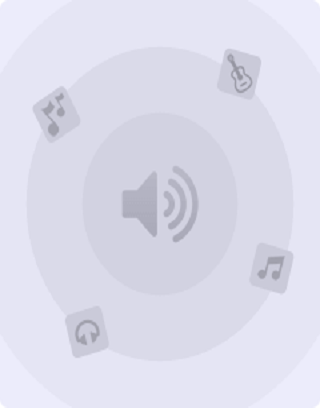

In [4]:
html

In [5]:
from bs4 import BeautifulSoup

<html lang="en"><head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<meta content="telephone=no" name="format-detection"/>
<meta charset="utf-8"/>
<meta content="mst3EDdpHbIKH409fDtfXk-wS6DAbcyLv-BXDg55gfo" name="google-site-verification"/>
<meta content="no-transform" http-equiv="Cache-control"/>
<meta content="width=device-width, initial-scale=1.0, user-scalable=yes" name="viewport"/>
<meta content="" name="author"/>
<meta content="website" name="og:type"/>
<meta content="Ajio.com" name="og:site_name"/>
<meta content="233163173739076" name="fb:app_id"/>
<meta content="summary" name="twitter:card"/>
<meta content="@AJIOLife" name="twitter:site"/>
<meta content="Buy online at Min 30 Percent Off. Huge footwear and Clothing range. Order now and avail Best Discounts, Cash on Delivery, Easy Returns and Exchange." name="description"/>
<meta content="Buy online at Min 30 Percent Off. Huge footwear and Clo
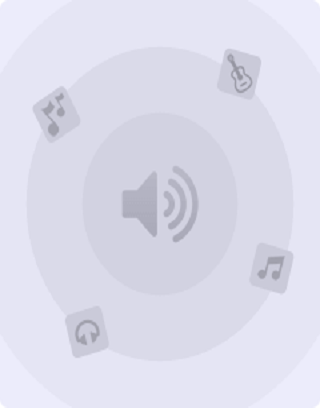

In [6]:
soup = BeautifulSoup(html, 'html.parser')
soup

In [7]:
category = list(map(lambda x : x.text, soup.select('div.brand > strong')))
category # total 1166 category names

['KISAH',
 'KISAH',
 'KISAH',
 'KISAH',
 'KISAH',
 'KISAH',
 'KISAH',
 'KISAH',
 'KISAH',
 'KISAH',
 'KISAH',
 'KISAH',
 'KISAH',
 'KISAH',
 'Deyann',
 'KISAH',
 'KISAH',
 'KISAH',
 'KISAH',
 'KISAH',
 'KISAH',
 'KISAH',
 'Anil Kumar Ajit Kumar',
 'KISAH',
 'KISAH',
 'hangup',
 'KISAH',
 'hangup',
 'KISAH',
 'KISAH',
 'KISAH',
 'KISAH',
 'KISAH',
 'HANGUP PLUS',
 'KISAH',
 'KISAH',
 'hangup',
 'hangup',
 'hangup',
 'hangup',
 'hangup',
 'KISAH',
 'KISAH',
 'hangup',
 'ChitwanMohan',
 'SOJANYA',
 'KISAH',
 'KISAH',
 'hangup',
 'HANGUP PLUS',
 'ChitwanMohan',
 'Melange By Lifestyle',
 'KISAH',
 'KISAH',
 'KISAH',
 'KISAH',
 'KISAH',
 'KISAH',
 'KISAH',
 'KISAH',
 'KISAH',
 'KISAH',
 'KISAH',
 'SOJANYA',
 'KISAH',
 'KISAH',
 'KISAH',
 'KISAH',
 'HANGUP PLUS',
 'KISAH',
 'KISAH',
 'KISAH',
 'KISAH',
 'hangup',
 'KISAH',
 'hangup',
 'KISAH',
 'KISAH',
 'HANGUP PLUS',
 'KISAH',
 'KISAH',
 'KISAH',
 'KISAH',
 'KISAH',
 'KISAH',
 'HANGUP PLUS',
 'hangup',
 'hangup',
 'hangup',
 'hangup',
 'KIS

In [8]:
names = list(map(lambda x : x.text, soup.select('div.nameCls')))
names # total 1166 names we get
# len(names)

['Floral Pattern Sherwani Set',
 'Sherwani Set with Woven Motifs',
 'Men Embroidered Regular Fit Sherwani Set',
 'Embellished Sherwani Set',
 'Men Embroidered Sherwani & Pyjamas Set',
 'Sherwani Set with Woven Motifs',
 'Mandarin Collar Sherwani & Kurta with Churidar Set',
 'Printed Mandarin-Neck Sherwani Set',
 'Buttoned-Up 3-Piece Sherwani Set',
 'Sherwani Set with Woven Motifs',
 'Men Paisley Woven Sherwani & Dhoti Set',
 'Embellished Sherwani Set',
 'Men Floral Woven Sherwani with Kurta & Churidar',
 'Men Paisley Woven Regular Fit Sherwani with Kurta & Dhoti Pants',
 '3-Piece Sherwani Set',
 'Self-design Sherwani Set',
 'Men Leaf Woven Sherwani & Pyjamas et',
 'Mandarin-Neck Sherwani Set',
 'Floral Sherwani and Churidar Set',
 'Sherwani Set with Paisley Woven Motifs',
 'Sherwani Set with Floral Woven Motifs',
 'Men Floral Woven Regular Fit Sherwani Set',
 'Self-Design Sherwani Set',
 'Men Self-Design Regular Fit Sherwani Set',
 'Floral Woven Sherwani Set',
 'Floral Print Sherwani w

In [9]:
prices = list(map(lambda x : int(x.text.replace(',', '')[1::]), soup.select('span.price')))
prices

[9061,
 8699,
 5899,
 4508,
 13999,
 6653,
 7746,
 7439,
 6164,
 8413,
 8500,
 5829,
 7598,
 12100,
 5995,
 6399,
 6399,
 4514,
 7099,
 8900,
 6373,
 9300,
 3967,
 6599,
 6480,
 2600,
 9198,
 2900,
 5609,
 4361,
 4115,
 5899,
 9899,
 3100,
 8599,
 6784,
 2900,
 3120,
 2600,
 3120,
 2700,
 11199,
 3693,
 2600,
 2099,
 1600,
 4818,
 8899,
 3120,
 2900,
 2799,
 1500,
 11398,
 10098,
 8000,
 9799,
 6986,
 6499,
 8998,
 5566,
 6899,
 8362,
 6952,
 2804,
 8700,
 9898,
 7999,
 9199,
 2900,
 5904,
 9599,
 8700,
 6322,
 2900,
 7799,
 2900,
 9099,
 7800,
 2900,
 3895,
 10799,
 5931,
 8499,
 3476,
 10400,
 2900,
 2900,
 2900,
 3100,
 990,
 7534,
 11400,
 7100,
 8399,
 6698,
 8600,
 5000,
 7899,
 4995,
 7999,
 6999,
 2799,
 7599,
 2900,
 6699,
 7798,
 8899,
 5899,
 8399,
 5799,
 4799,
 7299,
 2995,
 2589,
 5048,
 7298,
 6499,
 6299,
 9199,
 10199,
 4199,
 5899,
 6699,
 6999,
 2900,
 4995,
 3120,
 8499,
 8199,
 5799,
 9998,
 8700,
 6899,
 4940,
 10099,
 5248,
 9699,
 8200,
 7799,
 9499,
 5699,
 195

In [10]:
orginal_prices = list(map(lambda x : int(x.text.replace(',', '')[1::]), soup.select('span.orginal-price')))
orginal_prices

[17097,
 15797,
 10399,
 9999,
 20599,
 12097,
 14897,
 15498,
 13399,
 16497,
 13998,
 10998,
 12700,
 18598,
 11990,
 11099,
 11198,
 10999,
 14499,
 15097,
 12497,
 15198,
 6399,
 11499,
 14399,
 9999,
 17097,
 9999,
 10998,
 10999,
 10999,
 10399,
 15997,
 9999,
 14498,
 11499,
 9999,
 12999,
 9999,
 12999,
 9999,
 17298,
 10999,
 9999,
 2999,
 4999,
 7899,
 14398,
 12999,
 9999,
 3999,
 2999,
 18597,
 15500,
 13600,
 15999,
 13698,
 11299,
 15298,
 12099,
 12299,
 16397,
 11397,
 5499,
 14599,
 16897,
 13397,
 16598,
 9999,
 14399,
 15600,
 13300,
 12397,
 9999,
 15597,
 9999,
 16297,
 12398,
 9999,
 10499,
 16699,
 13499,
 13497,
 8999,
 15899,
 9999,
 9999,
 9999,
 9999,
 2999,
 13698,
 19098,
 11698,
 11499,
 12199,
 16098,
 19999,
 11499,
 9990,
 12898,
 11299,
 3999,
 14298,
 9999,
 11198,
 13598,
 13498,
 10499,
 13198,
 12399,
 7899,
 11599,
 5990,
 3699,
 9899,
 17299,
 11498,
 11699,
 13998,
 15999,
 10799,
 8899,
 11899,
 14099,
 9999,
 9990,
 12999,
 10999,
 11397,
 889

In [11]:
discounts = list(map(lambda x : x.text.replace("% off)", '').replace(" (", ''), soup.select('span.discount')))
discounts

['47',
 '45',
 '43',
 '55',
 '32',
 '45',
 '48',
 '52',
 '54',
 '49',
 '39',
 '47',
 '40',
 '35',
 '50',
 '42',
 '43',
 '59',
 '51',
 '41',
 '49',
 '39',
 '38',
 '43',
 '55',
 '74',
 '46',
 '71',
 '49',
 '60',
 '63',
 '43',
 '38',
 '69',
 '41',
 '41',
 '71',
 '76',
 '74',
 '76',
 '73',
 '35',
 '66',
 '74',
 '30',
 '68',
 '39',
 '38',
 '76',
 '71',
 '30',
 '50',
 '39',
 '35',
 '41',
 '39',
 '49',
 '42',
 '41',
 '54',
 '44',
 '49',
 '39',
 '49',
 '40',
 '41',
 '40',
 '45',
 '71',
 '59',
 '38',
 '35',
 '49',
 '71',
 '50',
 '71',
 '44',
 '37',
 '71',
 '63',
 '35',
 '56',
 '37',
 '61',
 '35',
 '71',
 '71',
 '71',
 '69',
 '67',
 '45',
 '40',
 '39',
 '27',
 '45',
 '47',
 '75',
 '31',
 '50',
 '38',
 '38',
 '30',
 '47',
 '71',
 '40',
 '43',
 '34',
 '44',
 '36',
 '53',
 '39',
 '37',
 '50',
 '30',
 '49',
 '58',
 '43',
 '46',
 '34',
 '36',
 '61',
 '34',
 '44',
 '50',
 '71',
 '50',
 '76',
 '23',
 '28',
 '35',
 '42',
 '38',
 '27',
 '39',
 '39',
 '64',
 '38',
 '43',
 '38',
 '35',
 '40',
 '30',
 '30',

In [12]:
import pandas as pd

ajio = pd.DataFrame({'category' : category, 'name' : names, 'price_inr' : prices, 
                     'orginal_price_inr' : orginal_prices, 'discount%' : discounts})
ajio

category                                             name  price_inr  \
0       KISAH                      Floral Pattern Sherwani Set       9061   
1       KISAH                   Sherwani Set with Woven Motifs       8699   
2       KISAH         Men Embroidered Regular Fit Sherwani Set       5899   
3       KISAH                         Embellished Sherwani Set       4508   
4       KISAH           Men Embroidered Sherwani & Pyjamas Set      13999   
...       ...                                              ...        ...   
1161    KISAH  Men Floral Woven Sherwani with Kurta & Churidar       8899   
1162    KISAH  Men Floral Woven Sherwani with Kurta & Churidar       8799   
1163    KISAH  Men Floral Woven Sherwani with Kurta & Churidar       8799   
1164    KISAH   Men Floral Woven Sherwani with Kurta & Pyjamas       9299   
1165    KISAH   Men Floral Woven Sherwani with Kurta & Pyjamas       9300   

      orginal_price_inr discount%  
0                 17097        47  
1                 15797        45  
2                 10399        43  
3                  9999        55  
4                 20599        32  
...                 ...       ...  
1161              12699        30  
1162              13599        35  
1163              12699        31  
1164              13498        31  
1165              14198        35  

[1166 rows x 5 columns]

In [13]:
ajio.to_csv('ajio.csv', index = False)

In [14]:
ajio = pd.read_csv('ajio.csv')
ajio

category                                             name  price_inr  \
0       KISAH                      Floral Pattern Sherwani Set       9061   
1       KISAH                   Sherwani Set with Woven Motifs       8699   
2       KISAH         Men Embroidered Regular Fit Sherwani Set       5899   
3       KISAH                         Embellished Sherwani Set       4508   
4       KISAH           Men Embroidered Sherwani & Pyjamas Set      13999   
...       ...                                              ...        ...   
1161    KISAH  Men Floral Woven Sherwani with Kurta & Churidar       8899   
1162    KISAH  Men Floral Woven Sherwani with Kurta & Churidar       8799   
1163    KISAH  Men Floral Woven Sherwani with Kurta & Churidar       8799   
1164    KISAH   Men Floral Woven Sherwani with Kurta & Pyjamas       9299   
1165    KISAH   Men Floral Woven Sherwani with Kurta & Pyjamas       9300   

      orginal_price_inr  discount%  
0                 17097         47  
1                 15797         45  
2                 10399         43  
3                  9999         55  
4                 20599         32  
...                 ...        ...  
1161              12699         30  
1162              13599         35  
1163              12699         31  
1164              13498         31  
1165              14198         35  

[1166 rows x 5 columns]